In [3]:
!pip install seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
import pandas as pd
df = pd.read_csv('student_data.csv') 
print("columns and rows:")
print(df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nMissing values in each column:")
print(df.isnull().sum())
print("\nData types of each column:")
print(df.dtypes)


columns and rows:
(10, 6)

First 5 rows of the dataset:
   StudentID   Age  Gender  Marks       City  Attendance
0          1  18.0    Male   85.0  Hyderabad          90
1          2  19.0  Female   78.0  Bangalore          88
2          3  17.0    Male   92.0  Hyderabad          95
3          4   NaN  Female   67.0    Chennai          85
4          5  20.0    Male   56.0  Hyderabad          70

Missing values in each column:
StudentID     0
Age           1
Gender        0
Marks         1
City          0
Attendance    0
dtype: int64

Data types of each column:
StudentID       int64
Age           float64
Gender         object
Marks         float64
City           object
Attendance      int64
dtype: object


In [6]:
print(df.isnull().sum())df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Marks'] = df['Marks'].fillna(df['Marks'].mean()) 


StudentID     0
Age           0
Gender        0
Marks         0
City          0
Attendance    0
dtype: int64


In [8]:
print(df.isnull().sum())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Marks'] = df['Marks'].fillna(df['Marks'].median()) 


StudentID     0
Age           0
Gender        0
Marks         0
City          0
Attendance    0
dtype: int64


In [10]:
print(df.isnull().sum())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])


StudentID     0
Age           0
Gender        0
Marks         0
City          0
Attendance    0
dtype: int64


In [12]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'City'])
print(df_encoded)


   StudentID        Age       Marks  Attendance  Gender_Female  Gender_Male  \
0          1  18.000000   85.000000          90          False         True   
1          2  19.000000   78.000000          88           True        False   
2          3  17.000000   92.000000          95          False         True   
3          4  20.444444   67.000000          85           True        False   
4          5  20.000000   56.000000          70          False         True   
5          6  22.000000   76.222222          80           True        False   
6          7  21.000000   45.000000          65          False         True   
7          8  23.000000   98.000000         100           True        False   
8          9  24.000000   60.000000          78           True        False   
9         10  20.000000  105.000000          85          False         True   

   City_Bangalore  City_Chennai  City_Hyderabad  
0           False         False            True  
1            True         Fals

In [14]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 5.7 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.1 MB 5.7 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/11.1 MB 5.7 MB/s eta 0:00:02
   ----------------- ---------------------- 4.7/11.1 MB 5.9 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.1 MB 6.1 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 6.9 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.1 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 7.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   - -------------------------------------- 1.6/41.0 MB 7.9 MB/s eta 0:00:06
   --- ------------------------------------ 3.4/41.0 MB 8.5 MB/s eta 0:00:05
   ----- ---------------------------------- 5.2/41.0 MB 8.4 MB/s eta 0:00:05
   ------- 


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from sklearn.preprocessing import StandardScaler
num_cols = ['Age', 'Marks', 'Attendance']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print(df)

   StudentID           Age  Gender         Marks       City  Attendance
0          1 -1.189624e+00    Male  4.786139e-01  Hyderabad    0.628055
1          2 -7.029595e-01  Female  9.693445e-02  Bangalore    0.431788
2          3 -1.676288e+00    Male  8.602933e-01  Hyderabad    1.118723
3          4 -7.353292e-16  Female -5.028475e-01    Chennai    0.137387
4          5 -2.162952e-01    Male -1.102629e+00  Hyderabad   -1.334617
5          6  7.570333e-01  Female  3.085621e-16  Bangalore   -0.353281
6          7  2.703690e-01    Male -1.702411e+00    Chennai   -1.825285
7          8  1.243698e+00  Female  1.187447e+00  Hyderabad    1.609391
8          9  1.730362e+00  Female -8.845269e-01  Bangalore   -0.549548
9         10 -2.162952e-01    Male  1.569126e+00    Chennai    0.137387


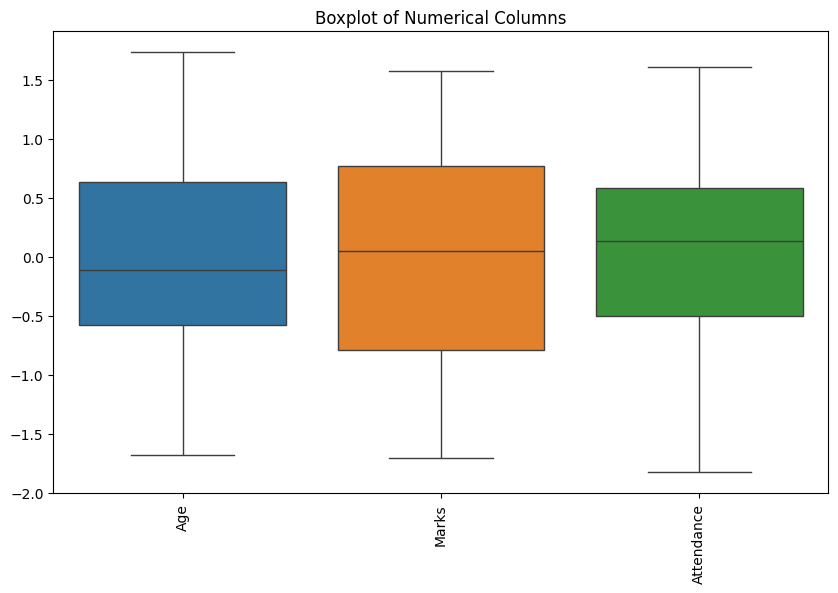

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Columns")
plt.show()
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
